<a href="https://colab.research.google.com/github/hny00/LLM/blob/main/LLM_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Vector DB

**벡터 데이터베이스**는 문서나 데이터의 벡터 임베딩을 저장하고, 질의 시 이 벡터들과 유사한 벡터를 효율적으로 검색하는 데 사용됩니다. 이 벡터 디비는 고차원의 벡터 공간에서 유사한 데이터 포인트를 빠르게 찾을 수 있게 해 주며, 대규모 데이터셋에서도 빠른 검색 속도를 보장합니다.

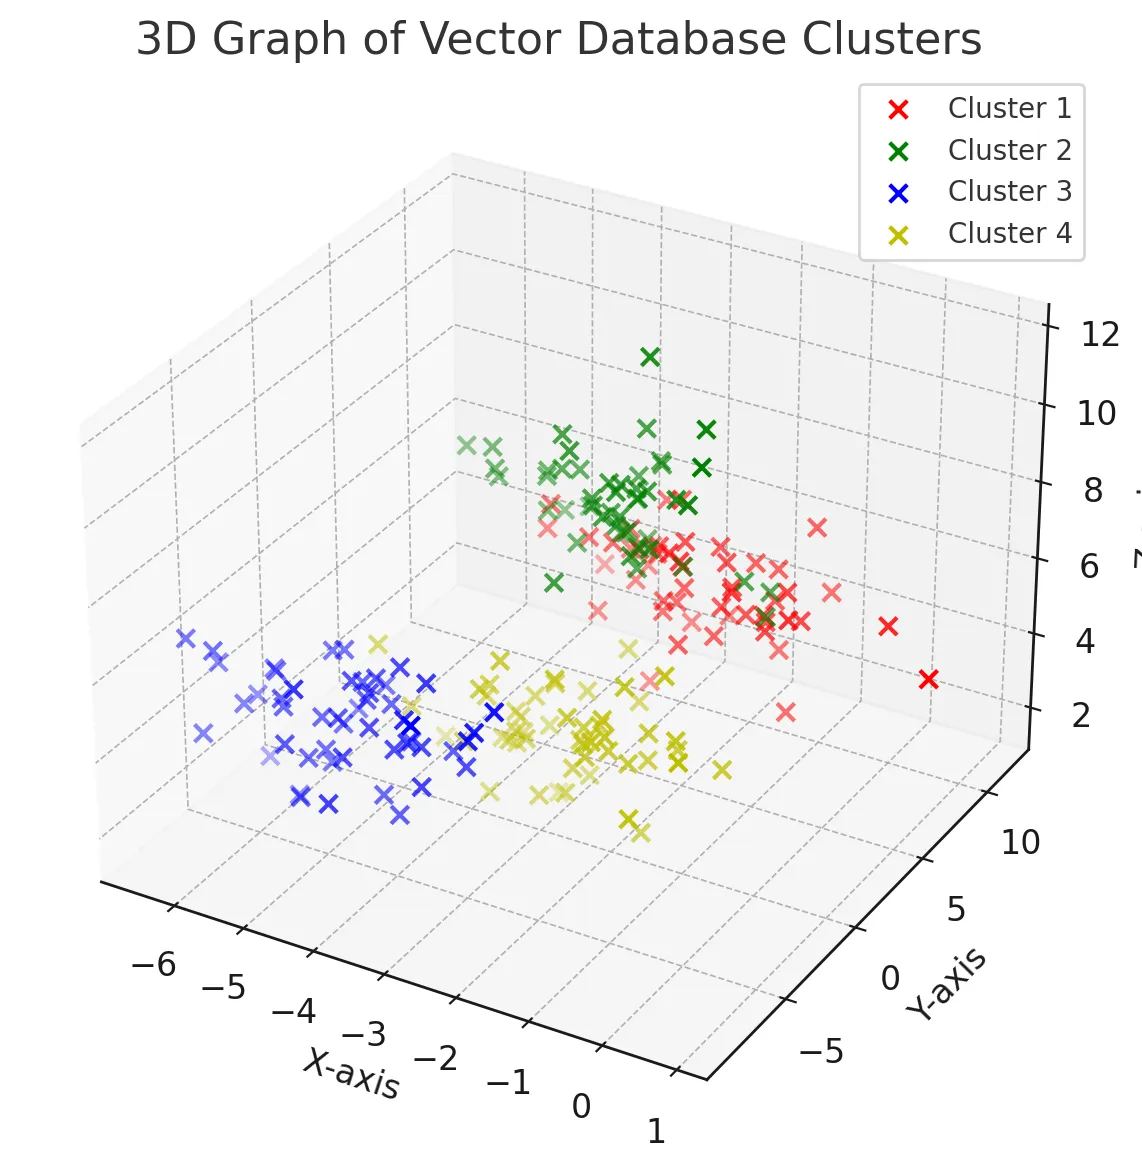

### 검색방법

1. **k-Nearest Neighbors (k-NN) Search**

k-NN은 특정 쿼리 벡터  $q$ 와 가장 가까운 $k$ 개의 벡터를 찾는 방식입니다. 거리 계산 방식으로는 **유클리디안 거리**나 **코사인 유사도**를 주로 사용합니다.

- **유클리디안 거리**:
여기서  $q$ 는 쿼리 벡터,  $x$ 는 데이터셋 내의 벡터,  $n$ 은 벡터의 차원 수입니다.

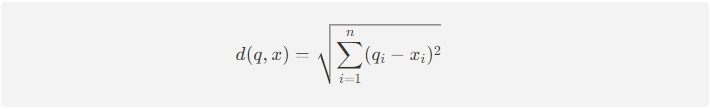

코사인 유사도:
코사인 유사도는 두 벡터 사이의 각도를 측정하는 방식으로, 값이 1에 가까울수록 유사도가 높습니다.

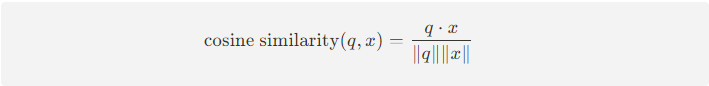

k-NN 검색은 모든 벡터에 대해 거리를 계산하므로, 데이터셋이 클수록 속도 저하가 발생할 수 있습니다.

2. **Approximate Nearest Neighbor (ANN) Search**

ANN은 정확한 근접 이웃 대신 근사값을 찾아주는 방식입니다. 이 방식에서는 주로 **HNSW**, **LSH**, **IVF** 등의 알고리즘이 사용됩니다.

- **HNSW (Hierarchical Navigable Small World)**:
HNSW는 그래프 $G$ 를 구성하여 유사 벡터들을 이웃으로 연결합니다. 각 쿼리에서 가까운 이웃을 탐색하는데, 수학적으로는 그래프 탐색을 통해 이웃 벡터 집합을  $N(q)$ 로 정의할 수 있습니다.
- **Locality Sensitive Hashing (LSH)**:
LSH는 유사한 벡터들이 같은 해시 버킷에 들어가도록 설계됩니다.
여기서  $h$ 는 벡터를 해싱하는 함수로, 유사한 벡터는 같은 해시 버킷에 위치하도록 설계됩니다.

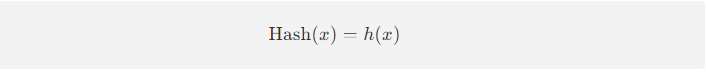

3. **HNSW (Hierarchical Navigable Small World)**

HNSW는 그래프 기반으로, 서로 유사한 벡터들을 연결하여 검색 속도를 높입니다. 그래프의 계층적 구조를 사용하여 쿼리 벡터의 이웃을 탐색합니다.

- 계층 그래프  $G$ 의 각 노드에는 해당 노드와 유사한 다른 노드들이 연결되어 있습니다.
- 쿼리 벡터  $q$ 에 대해 계층적 그래프를 탐색하면서 유사한 이웃을 찾는 방식입니다.

4. **Inverted File Index (IVF)**

IVF는 벡터들을 여러 클러스터로 나누어, 각 클러스터에 대해 검색을 수행하는 방식입니다.

1. 데이터셋을  $C$ 개의 클러스터로 분할합니다.
2. 클러스터 내에서 쿼리 벡터와 가장 유사한 벡터를 찾습니다.
여기서  $c_j$ 는 클러스터  $j$ 의 중심입니다. 클러스터를 선택한 후에는 선택된 클러스터에서만 유사도 계산을 수행하여 검색 효율을 높입니다.

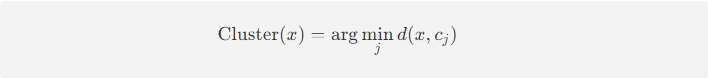

5. **PQ (Product Quantization)**

Product Quantization은 벡터를 여러 구간으로 나누고, 각 구간을 대표하는 클러스터 중심 벡터를 저장하여 유사도 검색을 수행합니다.

1. 벡터  $x$ 를 $m$ 개의 하위 벡터로 분할합니다 : $x = [x_1, x_2, \dots, x_m]$
2. 각 하위 벡터에 대해 사전 학습된 클러스터 중심에 매핑합니다.
3. 쿼리와의 거리는 각 하위 벡터 중심과의 거리로 근사합니다.

이렇게 하면 벡터 전체를 검색하는 대신 하위 벡터 중심끼리의 거리만 비교하므로 메모리와 시간 효율성을 높입니다.

6. **Hybrid Search (벡터 + 메타데이터)**

하이브리드 검색은 벡터 유사도와 메타데이터 필터링을 결합하여 검색 성능을 높이는 방식입니다.

- 예를 들어, 특정 카테고리  $C$ 에 속하는 데이터들만 검색하고자 할 때, 메타데이터 필터를 먼저 적용합니다:

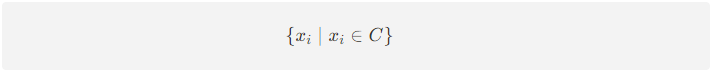

필터링된 데이터들에 대해 벡터 검색을 수행합니다.

### 벡터 데이터베이스 종류와 특징

1. **FAISS (Facebook AI Similarity Search)**
    - **특징**: Facebook AI Research에서 개발한 오픈소스 라이브러리로, 대규모 벡터 검색에 최적화되어 있습니다. 인덱스의 생성과 검색이 빠르고, 특히 대량의 데이터에서도 효율적으로 작동합니다. GPU 가속도 지원하여 빠른 검색 성능을 보장합니다.
    - **응용사례**: 챗봇 시스템에서 질문에 대한 적절한 답변을 찾기 위해 미리 준비된 문서의 임베딩을 저장하고 유사한 문서를 검색할 때 사용됩니다. 예를 들어, 고객 문의에 대한 FAQ 문서를 벡터화하여 관련 질문을 빠르게 검색할 수 있습니다.

In [ ]:
!pip install sentence-transformers scikit-learn faiss-gpu

In [ ]:
# 필요한 라이브러리 임포트
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

# 제목과 조치사항을 포함한 딕셔너리 데이터 준비
responses = [
    {
        "title": "제품의 전원이 켜지지 않습니다.",
        "action": "전원 어댑터와 케이블을 확인해 주세요. 문제가 지속되면 서비스 센터 방문을 권장합니다."
    },
    {
        "title": "화면에 줄이 생겼어요.",
        "action": "화면 케이블 연결 상태를 확인하고, 문제가 해결되지 않으면 제품을 점검 받아보세요."
    },
    {
        "title": "소리가 나오지 않아요.",
        "action": "음량 설정 및 음소거 여부를 확인하고, 이어폰을 연결해 문제를 확인해 주세요."
    },
    {
        "title": "배터리 충전이 제대로 되지 않습니다.",
        "action": "충전기와 케이블 상태를 확인하고, 다른 충전기를 사용해보세요. 문제가 지속될 경우 배터리 점검을 받아보거나 교체하세요."
    },
    {
        "title": "제품이 과열되는 것 같아요.",
        "action": "사용 환경을 확인하고, 환기가 잘 되는 곳에서 사용해 주세요. 과열이 계속되면 점검이 필요합니다."
    }

]

# 텍스트 임베딩을 위한 모델 로드
model = SentenceTransformer('all-MiniLM-L6-v2')
titles = [response["title"] for response in responses]
embeddings = model.encode(titles)

# FAISS 인덱스 생성 및 벡터 추가
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

# 예제 질의
query = "배터리가 충전되지 않아요."
query_vector = model.encode([query])

# FAISS를 사용해 유사한 제목 검색 (Top 3)
k = 3  # 상위 3개 유사한 제목 출력
distances, indices = index.search(query_vector, k)

# 검색 결과 출력
print(f"질의: {query}")
print("유사한 A/S 응답:")
for idx, (dist, index) in enumerate(zip(distances[0], indices[0])):
    title = responses[index]["title"]
    action = responses[index]["action"]
    print(f"{idx + 1}. 제목: {title}")
    print(f"   조치사항: {action} (거리: {dist})")

**연습문제 1**

- 위 예시를 참고하여 예상질문에 대한 문서를 만들고 임베딩하여 QnA 시스템을 개발하세요(Colab 사용) - Vector DB를 사용하면 embdedding된 많은 양의 문서를 효율적으로 사용 할 수 있는 장점이 있습니다.
- LLM에 전송될 Context 문장 형식으로 구성하는 연습(User Query를 보충하여 LLM에 전송될 Context를 구성하세요) - QnA 자동 답변 시스템이라고 가정 - 예) 교통법규 또는 헌법전문을 이용

1. **Pinecone**
    - **특징**: 클라우드 기반의 벡터 데이터베이스 서비스로, 자동 확장과 인덱스 관리 기능을 제공합니다. 사용자는 서버 설정이나 유지보수를 신경 쓰지 않아도 되고, 서버리스 환경에서 쉽게 벡터 검색을 사용할 수 있습니다.
    - **응용사례**: 전자 상거래에서 사용자의 검색이나 관심 상품과 유사한 제품을 추천하는 추천 시스템에 활용됩니다. 사용자가 특정 상품을 검색하면, 해당 상품의 임베딩을 통해 비슷한 제품을 빠르게 찾아 추천할 수 있습니다.
2. **Milvus**
    - **특징**: 오픈소스 벡터 데이터베이스로, 벡터 검색뿐만 아니라 이미지, 비디오, 음성 데이터 등의 다양한 멀티미디어 데이터 검색에 최적화되어 있습니다. 고성능의 검색과 확장성을 제공하며, 다양한 AI 프레임워크와 쉽게 통합할 수 있습니다.
    - **응용사례**: 이미지 검색 시스템에서 사용됩니다. 예를 들어, 사용자가 특정 이미지의 유사한 이미지를 찾고자 할 때, 이미지를 벡터화하여 데이터베이스에 저장하고 유사한 이미지를 검색하는 데 활용됩니다.
3. **Weaviate**
    - **특징**: 그래프 데이터와 결합된 벡터 데이터베이스로, 벡터 검색뿐 아니라 데이터 간의 관계를 그래프로 표현하고 쿼리할 수 있습니다. 자연어 처리 및 검색에 강점을 보이며, 자동화된 데이터 처리 파이프라인을 지원합니다.
    - **응용사례**: 콘텐츠 기반 검색 및 추천 시스템에서 많이 사용됩니다. 예를 들어, 블로그 글을 벡터화하여 사용자가 원하는 주제와 유사한 글을 추천하거나, 연구 논문의 키워드 기반 검색에 활용할 수 있습니다.

### 벡터 데이터베이스의 응용사례

1. **챗봇 및 QA 시스템**
    - 질문과 문서, 또는 질문과 답변을 벡터화하여 유사한 질문을 빠르게 검색하고, 적절한 답변을 제공할 수 있습니다.
2. **추천 시스템**
    - 사용자의 행동 데이터(예: 클릭, 검색어)를 벡터로 변환하여 유사한 행동을 보인 다른 사용자와의 벡터를 비교하여 개인화된 추천을 제공할 수 있습니다.
3. **검색 엔진 최적화**
    - 전통적인 키워드 기반 검색이 아닌, 문장의 의미와 유사한 문서나 텍스트를 찾기 위해 벡터 검색을 사용합니다. 이를 통해 더 정교한 검색 결과를 제공할 수 있습니다.
4. **멀티미디어 데이터 검색**
    - 이미지, 비디오, 음성 데이터 등의 멀티미디어 파일을 벡터화하여 유사한 데이터를 찾을 수 있습니다. 예를 들어, 이미지 검색에서는 특정 이미지와 비슷한 이미지들을 빠르게 찾아낼 수 있습니다.

### 벡터 데이터베이스를 사용하는 이유

벡터 데이터베이스는 데이터를 고차원 벡터 형태로 표현하여 유사한 데이터 검색을 효율적으로 수행할 수 있게 합니다. 이를 사용하는 이유는 다음과 같습니다:

1. **효율적인 유사성 검색**:
    - 텍스트, 이미지, 오디오 등 다양한 데이터를 벡터로 표현하고, 이를 통해 유사한 데이터를 빠르게 찾을 수 있습니다. 전통적인 키워드 검색보다 더 정밀한 유사성 기반 검색이 가능하며, 검색 속도도 훨씬 빠릅니다.
2. **대용량 데이터 처리**:
    - 벡터 데이터베이스는 수백만 개 이상의 데이터 포인트를 관리할 수 있도록 설계되어 있어, 대규모 데이터셋에서도 고성능을 유지할 수 있습니다. 이는 특히 챗봇, 검색 엔진, 추천 시스템 등에 유용합니다.
3. **유연한 통합**:
    - 벡터 데이터베이스는 다양한 AI 모델과 쉽게 통합할 수 있어, 기존 AI 시스템을 향상시키거나 새로운 기능을 추가하는 데 도움을 줍니다. 텍스트 임베딩, 이미지 임베딩 등 다양한 벡터를 활용할 수 있습니다.
4. **고성능 검색**:
    - GPU 가속이나 분산 처리를 지원하여, 복잡한 쿼리도 빠르게 처리할 수 있으며, 실시간 응답이 필요한 서비스에 적합합니다.

### 벡터 데이터베이스 설치

1. **FAISS (Facebook AI Similarity Search)**
    - **다운로드 URL**: [FAISS GitHub](https://github.com/facebookresearch/faiss)
    - **설치**:

In [ ]:
pip install faiss-cpu  # CPU 버전
pip install faiss-gpu  # GPU 버전

2. **Pinecone**
    - **다운로드 URL**: [Pinecone Website](https://www.pinecone.io/)
    - **설치**:

In [ ]:
pip install pinecone-client

Pinecone은 클라우드 기반 서비스이기 때문에, API를 통해 사용하며, 별도의 로컬 설치는 필요하지 않습니다. 계정을 생성하고 클라우드 API 키를 통해 사용 가능합니다.

3. **Milvus**
    - **다운로드 URL**: [Milvus GitHub](https://github.com/milvus-io/milvus)
    - **설치**: Docker를 통해 쉽게 설치할 수 있습니다.

In [ ]:
docker pull milvusdb/milvus

4. **Weaviate**
    - **다운로드 URL**: [Weaviate GitHub](https://github.com/weaviate/weaviate)
    - **설치**: Docker 또는 클라우드 서비스로 사용 가능하며, Python 클라이언트를 설치할 수 있습니다.

In [ ]:
pip install weaviate-client

### FAISS Vector Database introduction

FAISS (Facebook AI Similarity Search)는 Facebook AI Research에서 개발한 **오픈소스 라이브러리**로, 대규모 데이터에서 고차원 벡터 간의 **빠른 유사성 검색**을 수행하기 위해 설계되었습니다. 주로 **딥러닝**과 **기계 학습**에서 생성된 임베딩 벡터 간의 검색에 많이 사용되며, 다음과 같은 특징이 있습니다.

### 1. FAISS의 특징

- **고성능 검색**:
    - FAISS는 수백만 개 이상의 고차원 벡터에서 유사한 벡터를 매우 빠르게 검색할 수 있습니다. 벡터의 유사성(거리)을 계산하여 가장 가까운 벡터들을 효율적으로 찾아낼 수 있습니다.
    - 다양한 인덱싱 기술을 사용해 검색 속도를 높이고 메모리 사용량을 줄이는 최적화를 지원합니다.
- **대규모 데이터 처리**:
    - 대규모 데이터에서도 높은 성능을 유지할 수 있도록 설계되었습니다. 벡터의 크기가 커도 메모리와 계산 속도를 효율적으로 관리합니다.
    - **GPU 가속**을 지원하여 더욱 빠른 검색이 가능합니다. 특히, 딥러닝 환경에서 생성된 대량의 임베딩 벡터를 실시간으로 검색할 때 유용합니다.
- **다양한 인덱스 알고리즘**:
    - FAISS는 다양한 인덱스 구조를 제공하며, 데이터의 특성과 크기에 맞춰 최적의 인덱스를 선택할 수 있습니다.
    - 검색 속도와 정확도 사이에서 트레이드오프를 선택할 수 있어, 빠른 검색을 원하면 일부 정확도를 희생할 수 있고, 반대로 정확한 검색이 필요하면 검색 속도를 다소 희생할 수 있습니다.
- **오픈소스**:
    - FAISS는 오픈소스로 공개되어 있어 누구나 무료로 사용할 수 있습니다. GitHub에서 소스를 확인하고 수정할 수 있으며, 다양한 커뮤니티와의 협력을 통해 발전하고 있습니다.

### 2. FAISS의 작동 방식

FAISS는 고차원 벡터 데이터에서 유사한 벡터를 검색할 때 사용되며, 주요 작동 방식은 다음과 같습니다:

1. **벡터 임베딩**:
    - 먼저 텍스트, 이미지, 오디오 등의 데이터를 **임베딩 벡터**로 변환합니다. 이를 위해 BERT, Word2Vec, ResNet 등의 딥러닝 모델을 사용해 고차원의 벡터로 변환합니다.
2. **인덱스 생성**:
    - FAISS는 효율적인 검색을 위해 벡터 데이터를 **인덱스**로 구성합니다. 이 과정에서 고차원 벡터 데이터를 분할하고, 효율적으로 검색할 수 있는 구조로 만듭니다.
    - 예를 들어, IVF는 벡터를 여러 클러스터로 나눠서 검색하는 방법이며, HNSW는 그래프 구조를 사용해 벡터를 연결하는 방식입니다.
3. **유사성 검색**:
    - 검색 시, 사용자는 질의 벡터를 입력하고 FAISS는 인덱스에서 해당 질의 벡터와 가장 유사한 벡터들을 빠르게 검색합니다.
    - 검색 결과는 유사도 순으로 정렬되며, 유사도가 높은 벡터부터 반환됩니다. 이 과정에서 **L2 거리**나 **코사인 유사도**를 사용해 벡터 간의 유사성을 측정할 수 있습니다.

### 3. FAISS의 응용 사례

- **추천 시스템**:
    - 사용자가 관심을 가진 아이템과 유사한 제품이나 콘텐츠를 빠르게 찾아 추천할 수 있습니다. 예를 들어, 사용자가 특정 음악을 좋아하면, 유사한 음악을 추천하는 데 사용될 수 있습니다.
- **이미지 검색**:
    - 사용자가 업로드한 이미지와 유사한 이미지를 데이터베이스에서 빠르게 찾아내는 이미지 검색 시스템을 구현할 수 있습니다.
- **챗봇 및 FAQ 검색**:
    - 고객의 질문에 유사한 질문과 답변을 벡터 검색을 통해 빠르게 찾아 제공할 수 있습니다. 미리 준비된 질문-답변 쌍을 임베딩하고, 유사한 질문을 검색해 답변을 반환합니다.
- **문서 유사도 검색**:
    - 대량의 문서에서 특정 주제와 관련된 문서들을 빠르게 검색할 수 있습니다. 연구 논문, 뉴스 기사, 보고서 등 다양한 텍스트 데이터의 유사성을 파악하는 데 사용됩니다.

### 4. FAISS 설치 및 사용 예시

### Installation

FAISS는 CPU 버전과 GPU 버전을 지원합니다.

- CPU 버전 설치:

In [ ]:
pip install faiss-cpu

GPU 버전 설치:

In [ ]:
pip install faiss-gpu

In [ ]:
import faiss
import numpy as np

# 임베딩 벡터 예시
vectors = np.random.random((1000, 128)).astype('float32')  # 1000개의 128차원 벡터

# FAISS 인덱스 생성 (L2 거리 사용)
dimension = vectors.shape[1]
index = faiss.IndexFlatL2(dimension)

# 벡터 추가
index.add(vectors)

# 유사도 검색
query_vector = np.random.random((1, 128)).astype('float32')  # 검색할 임베딩 벡터
k = 5  # 상위 5개 유사한 벡터 찾기
distances, indices = index.search(query_vector, k)

print("유사한 벡터 인덱스:", indices)
print("유사한 벡터 거리:", distances)

### 벡터데이터 베이스 저장 과정

벡터 데이터베이스에 데이터를 저장하려면, 먼저 데이터를 임베딩(embedding) 과정을 통해 벡터로 변환해야 합니다. 이 과정을 통해 텍스트, 이미지, 오디오 등의 다양한 데이터는 고차원의 수치형 벡터로 표현됩니다. 이 벡터들은 데이터의 의미나 특성을 수치적으로 나타내어, 벡터 공간에서 유사한 데이터끼리 가까운 위치에 있도록 합니다.

### 임베딩을 통한 벡터 변환 및 저장 과정

1. **데이터 준비**:
    - 먼저 텍스트, 이미지, 오디오 등 벡터화하려는 원본 데이터를 준비합니다. 예를 들어, 텍스트 문서, 질문, 제품 설명 등이 될 수 있습니다.
2. **임베딩 모델 선택**:
    - 데이터를 벡터로 변환하기 위해 적절한 임베딩 모델을 선택합니다. 일반적으로 사용하는 임베딩 모델은 다음과 같습니다:
        - **텍스트 데이터**: BERT, Word2Vec, GPT-3, KoBERT 등
        - **이미지 데이터**: ResNet, VGG, Inception 등
        - **오디오 데이터**: OpenL3, Wav2Vec 등
3. **임베딩 과정**:
    - 원본 데이터를 임베딩 모델에 입력하여 고차원의 벡터로 변환합니다. 임베딩 모델은 데이터를 벡터 공간으로 매핑하며, 데이터의 특성과 의미를 유지하면서 벡터로 표현합니다.
        - 예를 들어, 텍스트 데이터("오늘 날씨 어때?")를 임베딩하면 `[0.32, -0.15, 0.45, ...]`와 같은 벡터가 생성됩니다.
4. **벡터 데이터베이스로 벡터 저장**:
    - 생성된 벡터와 원본 데이터의 ID, 메타데이터 등을 함께 벡터 데이터베이스에 저장합니다. 벡터 데이터베이스는 고차원 벡터의 저장 및 빠른 검색을 위한 인덱스를 생성합니다.
        - **ID**: 벡터를 고유하게 식별하기 위한 ID를 설정합니다.
        - **메타데이터**: 원본 데이터와 관련된 추가 정보를 포함하여 검색 결과를 더 풍부하게 할 수 있습니다. 예를 들어, 텍스트 벡터의 경우 문서 제목, 작성 날짜 등을 메타데이터로 저장할 수 있습니다.
5. **인덱스 생성**:
    - 벡터 데이터베이스는 저장된 벡터들에 대해 인덱스를 생성하여, 유사한 벡터를 빠르게 검색할 수 있도록 최적화합니다. 인덱스 생성 과정에서는 여러 알고리즘(예: k-Nearest Neighbors, HNSW, IVF)이 사용될 수 있으며, 선택한 벡터 디비의 성능과 특징에 따라 다릅니다.
6. **유사성 검색 수행**:
    - 사용자가 질의를 하면, 질의를 벡터로 변환한 후, 벡터 데이터베이스에서 가장 유사한 벡터를 빠르게 검색합니다. 벡터 간의 거리는 코사인 유사도, 유클리드 거리 등을 통해 계산되며, 벡터가 가까울수록 더 유사한 데이터로 간주됩니다.

### 예시: 텍스트 데이터를 벡터 데이터베이스에 저장하는 과정

1. **텍스트 데이터 준비**:
    - "오늘의 뉴스 헤드라인"
2. **텍스트 임베딩**:
    - 임베딩 모델을 사용해 "오늘의 뉴스 헤드라인"을 벡터로 변환: `[0.25, 0.85, -0.33, ...]`
3. **벡터 데이터베이스에 저장**:
    - 벡터 데이터베이스에 저장할 데이터:
        - **ID**: `news_001`
        - **벡터**: `[0.25, 0.85, -0.33, ...]`
        - **메타데이터**: `{ "title": "오늘의 뉴스", "date": "2024-10-20" }`
4. **인덱스 생성 및 최적화**:
    - 벡터 데이터베이스는 벡터 인덱스를 생성하여 검색 속도를 최적화합니다.
5. **질의 수행 및 검색**:
    - 사용자가 "오늘 뉴스는?"이라고 질의하면, 이 텍스트를 임베딩하여 벡터로 변환 후, 유사한 벡터를 벡터 디비에서 검색하여 관련된 뉴스 데이터를 제공합니다.

예시 1 : Vector DB 저장 과정

In [ ]:
pip install faiss-cpu sentence-transformers

In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
import numpy as np

# 1. 텍스트 임베딩을 위한 모델 로드 (Sentence-BERT 사용)
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. 텍스트 데이터 준비
texts = [
    "오늘 날씨가 좋다.",
    "나는 파이썬 프로그래밍을 좋아한다.",
    "머신러닝은 흥미롭다.",
    "인공지능은 미래다.",
    "오늘의 뉴스는 경제에 대한 것이다."
]

# 3. 텍스트 데이터를 벡터로 변환 (임베딩)
embeddings = model.encode(texts)

# 4. FAISS 인덱스 생성 (유사도 검색을 위한 L2(유클리디언) 거리 사용)
dimension = embeddings.shape[1]  # 임베딩 벡터의 차원 수
index = faiss.IndexFlatL2(dimension)

# 5. 벡터 데이터베이스에 벡터 저장
index.add(embeddings)

# 6. 유사도 검색 함수 정의
def search(query, top_k=3):
    # 질의를 벡터로 변환 (임베딩)
    query_vector = model.encode([query])

    # 벡터 데이터베이스에서 유사한 벡터 검색
    distances, indices = index.search(query_vector, top_k)

    # 검색 결과 출력
    print("질의:", query)
    print("유사한 텍스트 (Top", top_k, "):")
    for idx, (dist, idx_text) in enumerate(zip(distances[0], indices[0])):
        print(f"{idx + 1}. {texts[idx_text]} (거리: {dist})")

# 7. 예제 질의를 통해 유사한 텍스트 검색
search("나는 파이썬 코딩을 즐긴다.")
search("인공지능에 대해 알려줘.")

1. **Sentence-BERT 모델 로드**:
    - `SentenceTransformer` 라이브러리를 사용하여 텍스트를 벡터로 임베딩합니다. 여기서는 `all-MiniLM-L6-v2` 모델을 사용합니다.
2. **텍스트 데이터 준비**:
    - 검색을 위해 벡터 데이터베이스에 저장할 텍스트 데이터를 준비합니다.
3. **임베딩 생성**:
    - 각 텍스트 데이터를 임베딩하여 벡터로 변환합니다. Sentence-BERT 모델을 통해 각 문장이 고차원 벡터로 표현됩니다.
4. **FAISS 인덱스 생성 및 벡터 저장**:
    - FAISS를 사용하여 인덱스를 생성하고, 벡터 데이터를 저장합니다. 여기서는 L2 거리 기반 검색을 사용합니다.
5. **검색 함수 정의 및 실행**:
    - 사용자가 입력한 질의를 임베딩하고, FAISS 인덱스를 사용하여 유사한 벡터를 검색합니다. 결과로 유사한 텍스트와 거리를 출력합니다.

위 예시에서, 사용자가 "나는 파이썬 코딩을 즐긴다."라고 입력하면, FAISS는 임베딩된 벡터와 가장 유사한 벡터를 찾아 "나는 파이썬 프로그래밍을 좋아한다." 텍스트를 검색 결과로 반환할 것입니다.

예시 2 : Vector DB 저장 데이터와 질의어에 대한 시각화

In [ ]:
pip install sentence-transformers scikit-learn matplotlib faiss-gpu

In [ ]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from sklearn.decomposition import PCA
import faiss
import numpy as np  # numpy를 추가로 임포트
from sentence_transformers import SentenceTransformer

# 특정 경로에 있는 폰트를 사용하도록 설정
font_path = '/content/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# Matplotlib에서 폰트 설정
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 텍스트 데이터 준비
texts = [
    "오늘 날씨가 좋다.",
    "나는 파이썬 프로그래밍을 좋아한다.",
    "머신러닝은 흥미롭다.",
    "인공지능은 미래다.",
    "오늘의 뉴스는 경제에 대한 것이다.",
    "파이썬 코딩을 즐긴다."
]

# 텍스트 임베딩을 위한 모델 로드
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)

# FAISS 인덱스 생성 및 벡터 추가
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

# 예제 질의
query = "파이썬 프로그래밍을 좋아해."
query_vector = model.encode([query])

# FAISS를 사용해 유사한 텍스트 검색 (Top 3)
k = 3  # 상위 3개 유사한 텍스트 출력
distances, indices = index.search(query_vector, k)

# 검색 결과 출력
print(f"질의: {query}")
print("유사한 텍스트:")
for idx, (dist, index) in enumerate(zip(distances[0], indices[0])):
    print(f"{idx + 1}. {texts[index]} (거리: {dist})")

# 기존 텍스트 + 질의 임베딩 추가
texts_with_query = texts + [query]
embeddings_with_query = np.vstack([embeddings, query_vector])

# PCA를 사용해 2D로 차원 축소
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_with_query)

# 그래프 그리기
plt.figure(figsize=(8, 6))
for i, text in enumerate(texts_with_query):
    color = 'red' if i == len(texts) else 'blue'  # 질의는 빨간색, 나머지는 파란색
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=color)
    plt.text(embeddings_2d[i, 0] + 0.01, embeddings_2d[i, 1] + 0.01, text, fontsize=9, fontproperties=fontprop)

# 질의 텍스트와 유사한 텍스트를 연결하여 선으로 표시
for idx in indices[0]:
    plt.plot(
        [embeddings_2d[-1, 0], embeddings_2d[idx, 0]],
        [embeddings_2d[-1, 1], embeddings_2d[idx, 1]],
        'k--', alpha=0.5  # 검은 점선으로 연결
    )

plt.title("텍스트 벡터의 2D 시각화 (질의와 유사한 텍스트)", fontproperties=fontprop)
plt.xlabel("PCA Component 1", fontproperties=fontprop)
plt.ylabel("PCA Component 2", fontproperties=fontprop)
plt.grid(True)
plt.show()

### **연습문제 1**

위 예시를 참고해 질의어와 데이터베이스 저장 데이터간의 유사도를 비교할 수 있도록 데이터를 구성해 비교연습하시오.

### **예시 3 : 여러개의 pdf 문서를 로딩해 임베딩하고 Vector DB에 저장 후 데이터와 질의어에 대한 시각화**

다음 예시는 특정 디렉토리에 pdf 문서가 여러개 있을 때 로딩해서 텍스트를 추출하고 임베딩한 후 FAISS를 이용해 문서를 인덱싱하는 과정에 대한 벡터공간을 표시하고 시각화한 예시입니다.

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from sklearn.decomposition import PCA
import faiss
import numpy as np
import fitz  # PyMuPDF
from sentence_transformers import SentenceTransformer

# 특정 경로에 있는 폰트를 사용하도록 설정
font_path = '/content/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# Matplotlib에서 폰트 설정
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 디렉터리에서 모든 PDF 파일 텍스트를 추출하는 함수
def extract_texts_from_pdfs(directory_path):
    texts = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(directory_path, filename)
            doc = fitz.open(pdf_path)
            pdf_text = ""
            for page in doc:
                pdf_text += page.get_text()
            texts.append(pdf_text)
    return texts

# PDF 파일들이 있는 디렉터리 경로 설정
directory_path = "/content/pdfs/"  # PDF 파일들이 있는 디렉터리 경로
pdf_texts = extract_texts_from_pdfs(directory_path)

# PDF에서 추출된 텍스트를 문장 단위로 나누기 (예시: 줄바꿈 기준으로 분리)
texts = []
for text in pdf_texts:
    sentences = text.split("\n")
    cleaned_sentences = [s.strip() for s in sentences if s.strip()]  # 빈 문장 제거
    texts.extend(cleaned_sentences)

# 텍스트 임베딩을 위한 모델 로드
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)

# FAISS 인덱스 생성 및 벡터 추가
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

# 예제 질의
query = "전북연구원 보수규정"
query_vector = model.encode([query])

# FAISS를 사용해 유사한 텍스트 검색 (Top 3)
k = 3  # 상위 3개 유사한 텍스트 출력
distances, indices = index.search(query_vector, k)

# 검색 결과 출력
print(f"질의: {query}")
print("유사한 텍스트:")
for idx, (dist, index) in enumerate(zip(distances[0], indices[0])):
    print(f"{idx + 1}. {texts[index]} (거리: {dist})")

# 기존 텍스트 + 질의 임베딩 추가
texts_with_query = texts + [query]
embeddings_with_query = np.vstack([embeddings, query_vector])

# PCA를 사용해 2D로 차원 축소
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_with_query)

# 그래프 그리기
plt.figure(figsize=(8, 6))
for i, text in enumerate(texts_with_query):
    color = 'red' if i == len(texts) else 'blue'  # 질의는 빨간색, 나머지는 파란색
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=color)
    plt.text(embeddings_2d[i, 0] + 0.01, embeddings_2d[i, 1] + 0.01, text, fontsize=9, fontproperties=fontprop)

# 질의 텍스트와 유사한 텍스트를 연결하여 선으로 표시
for idx in indices[0]:
    plt.plot(
        [embeddings_2d[-1, 0], embeddings_2d[idx, 0]],
        [embeddings_2d[-1, 1], embeddings_2d[idx, 1]],
        'k--', alpha=0.5  # 검은 점선으로 연결
    )

plt.title("텍스트 벡터의 2D 시각화 (질의와 유사한 텍스트)", fontproperties=fontprop)
plt.xlabel("PCA Component 1", fontproperties=fontprop)
plt.ylabel("PCA Component 2", fontproperties=fontprop)
plt.grid(True)
plt.show()

### Text Summary performance

다음은 뉴스  기사나 논문과 같은 긴 텍스트를 입력으로 받아 주요 내용을 요약하는 시스템을 구축합니다. LLM을
사용해 요약문을 생성하고, 다양한 요약 기법과 비교합기 위해 Hugging Face의 BART 또는 T5 모델을 사용해 텍스트 요약을 생성하고, GPT-3를 활용해 동일한 텍스트를 요약한 결과와 비교 하는 예제입니다.

In [ ]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import openai
import torch
import re

# 1. KoGPT-2 모델 로드 ("skt/kogpt2-base-v2")
kogpt2_model_name = "skt/kogpt2-base-v2"  # KoGPT-2 모델

# 모델과 토크나이저 로드 (BART, T5는 요약성능이 심하게 나쁨, KoGPT-2 역시 할루시네이션 쩔지만 그남아 성능이 나옴)
kogpt2_tokenizer = PreTrainedTokenizerFast.from_pretrained(
    kogpt2_model_name,
    bos_token='[BOS]', eos_token='[EOS]', unk_token='[UNK]', pad_token='[PAD]', mask_token='[MASK]'
)
kogpt2_model = GPT2LMHeadModel.from_pretrained(kogpt2_model_name).to("cuda" if torch.cuda.is_available() else "cpu")

# 2. OpenAI API 키 설정
openai.api_key = ""

# 3. 텍스트 전처리 함수
def clean_text(text):
    # 특수문자 및 불필요한 기호 제거
    text = re.sub(r'\n+', ' ', text)  # 줄바꿈 제거
    text = re.sub(r'[^가-힣a-zA-Z0-9.,?!\s]', '', text)  # 한글, 영어, 숫자, 기본 기호만 남기기
    return text.strip()

# 긴 텍스트 입력 (뉴스 기사나 논문)
text = """
2차 세계대전은 1939년부터 1945년까지 진행된 인류 역사에서 가장 광범위하고 치명적인 전쟁 중 하나로, 전 세계적으로 수억 명의 생명을 앗아갔고, 정치, 경제, 사회, 문화 등 다양한 측면에서 깊은 영향을 미쳤습니다. 이 전쟁은 단순히 군사적 충돌에 그치지 않고, 인류의 윤리와 도덕, 국제 관계의 패러다임을 바꿔 놓은 사건이었습니다.
전쟁의 배경
2차 세계대전의 배경에는 1차 세계대전 이후의 불안정한 국제 정세가 있습니다. 베르사유 조약은 독일에 가혹한 조건을 부과하였고, 이는 독일 내에서 극심한 불만과 경제적 어려움을 초래했습니다. 이러한 상황은 아돌프 히틀러와 나치당의 부상을 가능하게 했고, 그들은 독일의 재무장과 제국주의적 야망을 내세워 전쟁의 불씨를 지폈습니다. 또한, 일본과 이탈리아와 같은 다른 국가들도 제국주의적 확장을 추구하며 전쟁에 가담하게 되었습니다.
전쟁의 전개
2차 세계대전은 유럽, 아프리카, 아시아, 태평양 등 여러 전선에서 동시에 벌어졌습니다. 유럽에서는 독일의 침공으로 시작된 전투가 주요 사건으로, 폴란드 침공, 프랑스 점령, 소련과의 전쟁 등으로 이어졌습니다. 태평양 전선에서는 일본이 중국과 동남아시아를 침공하며 전쟁이 확산되었습니다. 1941년의 진주만 공격은 미국의 참전을 이끌어내는 결정적인 계기가 되었고, 이는 전쟁의 양상을 크게 변화시켰습니다.
"""

cleaned_text = clean_text(text)

# 4. KoGPT-2를 사용한 요약 생성 (프롬프트 기반)
def summarize_with_kogpt2(text, max_new_tokens=300):
    input_ids = kogpt2_tokenizer.encode(text, return_tensors="pt").to(kogpt2_model.device)
    output = kogpt2_model.generate(
        input_ids,
        max_new_tokens=max_new_tokens,  # 새롭게 생성할 토큰의 최대 수
        num_return_sequences=1,
        no_repeat_ngram_size=2,  # 반복 방지
        top_k=50,
        top_p=0.95,
        temperature=0.7,  # 텍스트 다양성 조절
        do_sample=True  # 샘플링을 사용해 텍스트 생성
    )
    summary = kogpt2_tokenizer.decode(output[0], skip_special_tokens=True)
    return summary

# 5. GPT-3을 사용한 요약 생성
def summarize_with_gpt3(text, max_tokens=150):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "너는 긴문장 요약을 도와주는 작가야!"},
            {"role": "user", "content": f"다음 텍스트를 요약해 줘:\n\n{text}"}
        ],
        max_tokens=max_tokens,
        temperature=0.7
    )
    return response.choices[0].message.content.strip()

# 6. 요약 생성 및 비교
kogpt2_summary = summarize_with_kogpt2("다음의 문장을 한문장으로 요약해 줘"+cleaned_text)
gpt3_summary = summarize_with_gpt3(cleaned_text)

# 결과 출력
print("KoGPT-2 요약 결과:")
print(kogpt2_summary)
print("\nGPT-3 요약 결과:")
print(gpt3_summary)